# **임대주택 단지 내 적정 주차수요 예측 대회**

**[배경]**

아파트 단지 내 필요한 주차대수는 ①법정주차대수 ②장래주차수요 중 큰 값에 따라 결정하게되어 있어, 정확한 ②장래주차수요의 산정을 필요로 합니다.<br>
현재 ②장래주차수요는 ‘주차원단위’와 ‘건축연면적’을 기초로하여 산출되고 있으며,<br>
‘주차원단위’는 신규 건축예정 부지 인근의 유사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법으로 조사하고 있습니다.<br>
이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제 건축시점과의 시간차 등의 문제로 과대 또는 과소 산정의 가능성을 배제할 수 없습니다.<br>

**[주제]**
유형별 임대주택 설계 시 단지 내 적정 주차 수요를 예측

**[평가]**

- 평가산식 : **MAE(Mean Absolute Error)**
- Public 평가 : 전체 Test 데이터 중 무작위 **33% (50단지)**
- Private 평가 : 전체 Test 데이터 중 나머지 **67% (100단지)**

**[외부 데이터 및 사전학습 모델]**

- 공공 데이터와 같이 누구나 얻을 수 있고 법적 제약이 없는 **외부 데이터 허용**
- 사전학습 모델의 경우 **사전학습에 사용된 데이터를 명시**해야함
- 최종 평가시 외부데이터 및 출처 제출

# Data Understanding

**train.csv - 학습용 데이터**

- 단지코드(key)
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수: 빈집
- 자격유형: 임차를 할 수 있는 자격 요건
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수(target)

**age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포**

- 지역
- 10대미만(여자)
- 10대미만(남자)
- 20대(여자)
- 20대(남자)
- 30대(여자)
- 30대(남자)
- 40대(여자)
- 40대(남자)
- 50대(여자)
- 50대(남자)
- 60대(여자)
- 60대(남자)
- 70대(여자)
- 70대(남자)
- 80대(여자)
- 80대(남자)
- 90대(여자)
- 90대(남자)
- 100대(여자)
- 100대(남자)

In [2]:
PATH = r'C:\Users\Wyatt\wyatt37\data\parking'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

In [4]:
age_gender = pd.read_csv(PATH + '\\new_age_gender_info.csv')
age_gender

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,...,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


In [5]:
train = pd.read_csv(PATH + '\\new_train.csv')
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [6]:
test = pd.read_csv(PATH + '\\new_test.csv')
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [7]:
sub = pd.read_csv(PATH + '\\new_sample_submission.csv')
sub

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
...,...,...
145,C2456,0
146,C1266,0
147,C2152,0
148,C1267,0


In [8]:
train.shape, test.shape, sub.shape, age_gender.shape, 

((2952, 15), (1022, 14), (150, 2), (16, 23))

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
도보 10분거리 내 버스정류장 수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1022.0,862.080235,536.340894,75.00,488.000,745.00,1161.0,2572.0
전용면적,1022.0,43.706311,35.890759,9.96,33.135,39.72,47.4,583.4
전용면적별세대수,1022.0,100.414873,125.997855,1.00,14.000,60.00,140.0,1341.0
공가수,1022.0,15.544031,11.070140,0.00,6.000,15.00,23.0,45.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),980.0,0.136735,0.435500,0.00,0.000,0.00,0.0,2.0
도보 10분거리 내 버스정류장 수,1022.0,4.626223,5.414568,1.00,2.000,3.00,5.0,50.0
단지내주차면수,1022.0,548.771037,342.636703,29.00,286.000,458.00,711.0,1696.0


- train set과 test set 의 평균과 편차가 큰 차이가 없습니다.

## age_gender_info

In [11]:
ag = age_gender.set_index('지역')

In [12]:
ag.loc['전체 평균'] = ag.mean()
ag.loc['광역시 평균'] = ag.loc[(ag.index.str.contains('시')) & (~ag.index.str.contains('세종'))].mean()
ag.loc['도 평균'] = ag.loc[ag.index.str.contains('도')].mean()

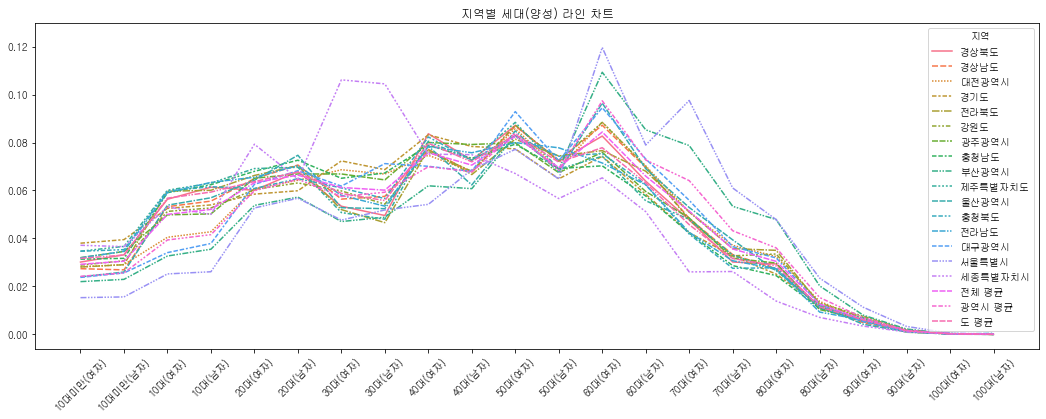

In [13]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.T, )
plt.title('지역별 세대(양성) 라인 차트')
plt.xticks(rotation=45)
plt.ylim(top=0.13)
plt.show()

- 비교적 정규 분포의 모양을 띄고 있습니다.
- 같은 나이대임에도 성별에 따라 편차가 존재합니다. 대체로 남성보다는 여성이 높은 비율을 보이고 있습니다.
- 서울특별시는 60대 여성, 70대 여성에서 피크를 보이고 있습니다.
- 부산광역시 또한 서울과 비슷한 패턴을 보입니다.
- 세종특별자치시는 다른 시도와는 다르게 30대에서 매우 높은 비중을 보입니다.

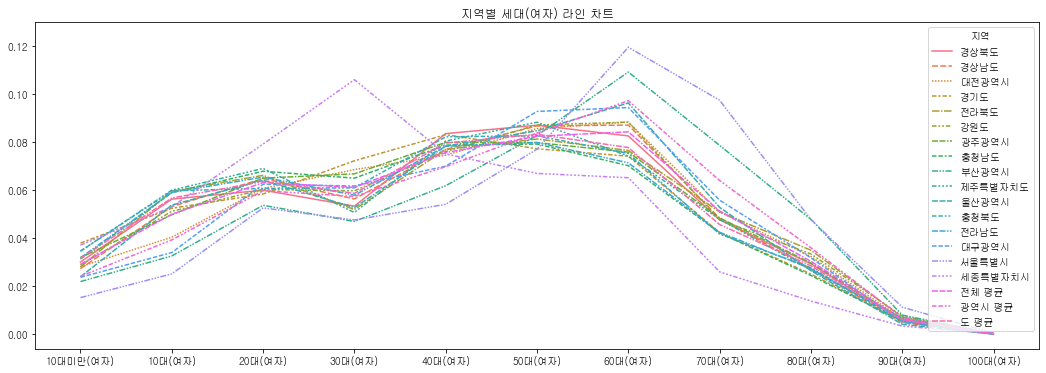

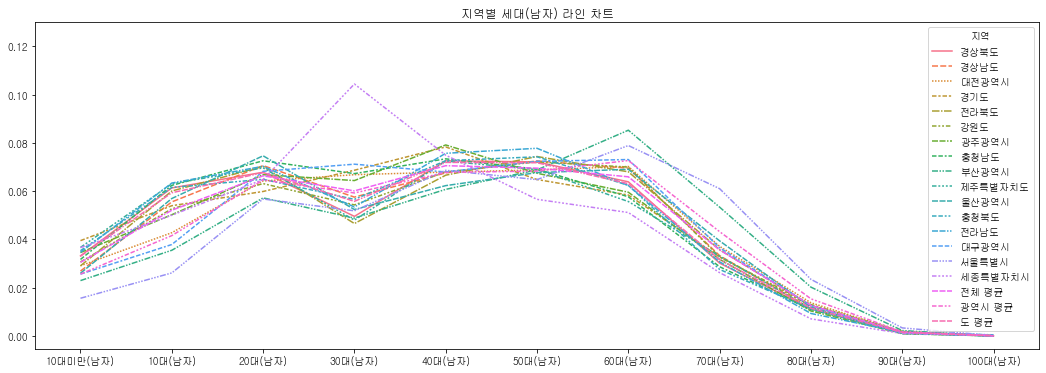

In [14]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.loc[:, ag.columns.str.contains('여자')].T)
plt.title('지역별 세대(여자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.loc[:, ag.columns.str.contains('남자')].T)
plt.title('지역별 세대(남자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

- 성별을 기준으로 따로 플롯을 그려보았을 때, 절대적인 비율의 차이는 있지만, 패턴은 똑같습니다.

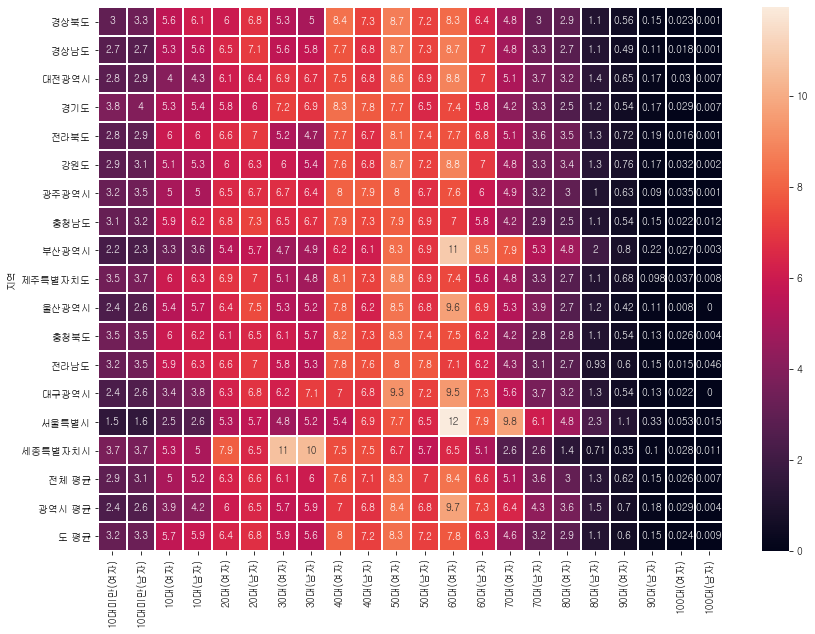

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap((ag*100).round(3),
           annot=True, linewidths=0.01,)

plt.show()

- 인구가 많은 특별시, 광역시에서 60~70대의 비중이 높은 것을 알 수 있습니다. (서울, 부산, 울산, 대구 등)
- 앞서 보았듯이 세종은 청년층 20~30대의 비중이 매우 높게 형성되어 있습니다.
- 광역시(세종 제외)와 도단위 지역구의 평균을 비교했을 때, 10대와 40대, 60~70대에서 차이가 두드러집니다.

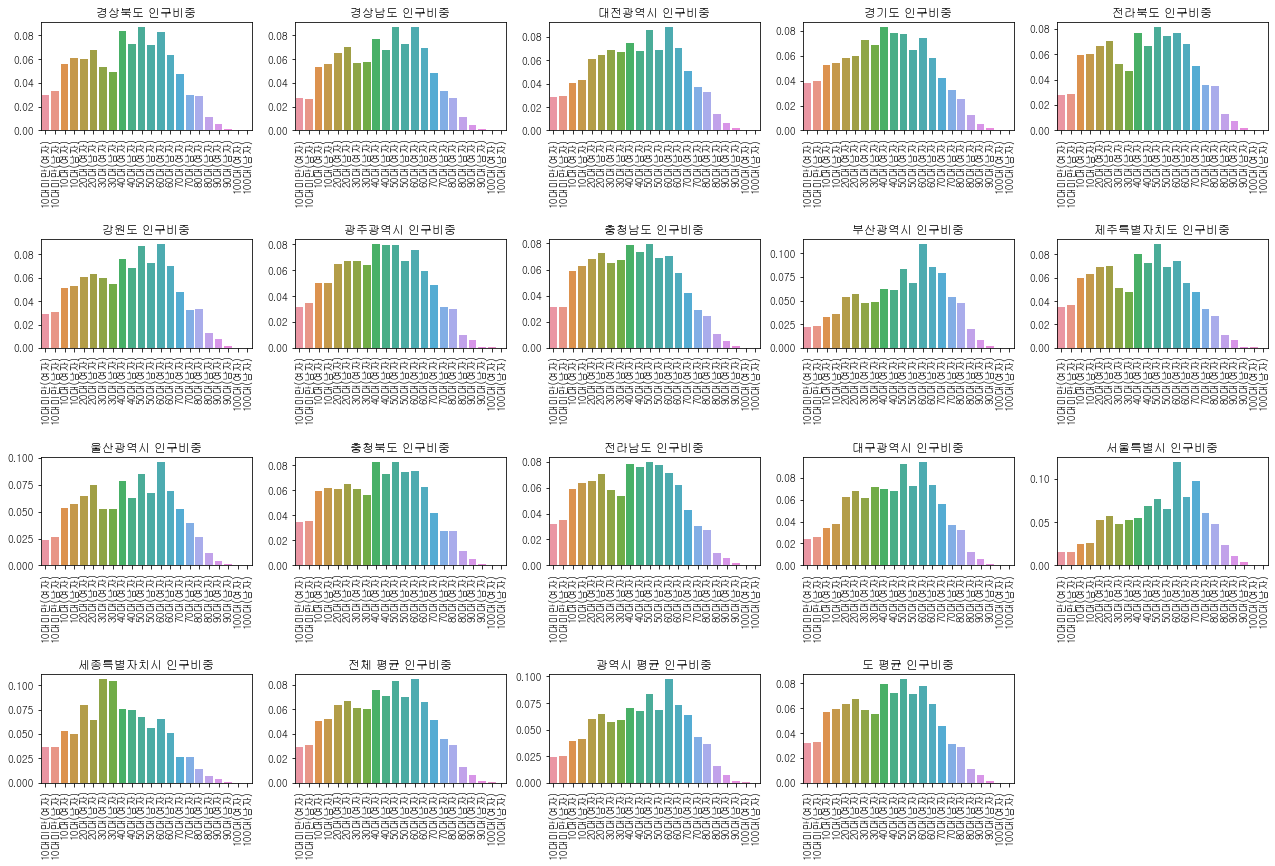

In [16]:
fig = plt.figure(figsize=(22, 18))
plt.xticks(rotation=90)
for i, n in enumerate(list(ag.index)):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=1.0)
    plt.title("{} 인구비중".format(n))
    sns.barplot(data=ag.loc[ag.index == n])
    plt.xticks(rotation=90)

- 각 행정구역별로 바플롯을 그려보았을 때, 앞서 살펴 본 특징들을 확인할 수 있습니다.
- 세종을 제외하고는 크게 두 패턴으로 나뉘는 것을 알 수 있습니다.

## train/test

train 데이터는 2개의 테이블이 합쳐진 것으로 판단 됩니다.

- 아파트 단지 타입별로 나뉘어진 테이블과
- 아파트 단지의 정보가 담긴 테이블입니다.

In [17]:
train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']]

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형,임대보증금,임대료
0,C2483,아파트,국민임대,39.72,134,A,15667000,103680
1,C2483,아파트,국민임대,39.72,15,A,15667000,103680
2,C2483,아파트,국민임대,51.93,385,A,27304000,184330
3,C2483,아파트,국민임대,51.93,15,A,27304000,184330
4,C2483,아파트,국민임대,51.93,41,A,27304000,184330
...,...,...,...,...,...,...,...,...
2947,C2532,아파트,국민임대,49.20,19,A,11346000,116090
2948,C2532,아파트,국민임대,51.08,34,A,14005000,142310
2949,C2532,아파트,국민임대,51.73,34,A,14005000,142310
2950,C2532,아파트,국민임대,51.96,114,A,14005000,142310


In [69]:
train_danji = train[['단지코드', '총세대수', '지역', '공가수',
                     '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
                     '단지내주차면수', '등록차량수']].drop_duplicates()

train_danji

,단지코드,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1425.0,1015.0
8,C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0
15,C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0
26,C1945,755,경기도,6.0,1.0,3.0,734.0,730.0
32,C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0
...,...,...,...,...,...,...,...,...
2932,C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,57.0
2937,C2035,492,강원도,24.0,0.0,1.0,521.0,246.0
2942,C2020,40,부산광역시,7.0,1.0,2.0,25.0,19.0
2945,C2437,90,충청북도,12.0,0.0,1.0,30.0,16.0


- train set의 단지는 총 423개입니다.

In [21]:
test[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
      '도보 10분거리 내 버스정류장 수', '단지내주차면수']].drop_duplicates()

,단지코드,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,경기도,14.0,0.0,2.0,683.0
8,C1128,1354,경기도,9.0,0.0,3.0,1216.0
17,C1456,619,부산광역시,18.0,0.0,16.0,547.0
26,C1840,593,전라북도,7.0,0.0,3.0,543.0
30,C1332,1297,경기도,11.0,0.0,2.0,1112.0
...,...,...,...,...,...,...,...
996,C2456,349,제주특별자치도,17.0,0.0,4.0,270.0
1000,C1266,596,충청북도,35.0,0.0,1.0,593.0
1005,C2152,120,강원도,9.0,0.0,1.0,40.0
1007,C1267,675,경상남도,38.0,0.0,1.0,467.0


- test set의 단지는 총 150개 입니다. 이중 50/100 개로 나뉘어 평가합니다.

### NA Values

결측치부터 살펴보겠습니다.

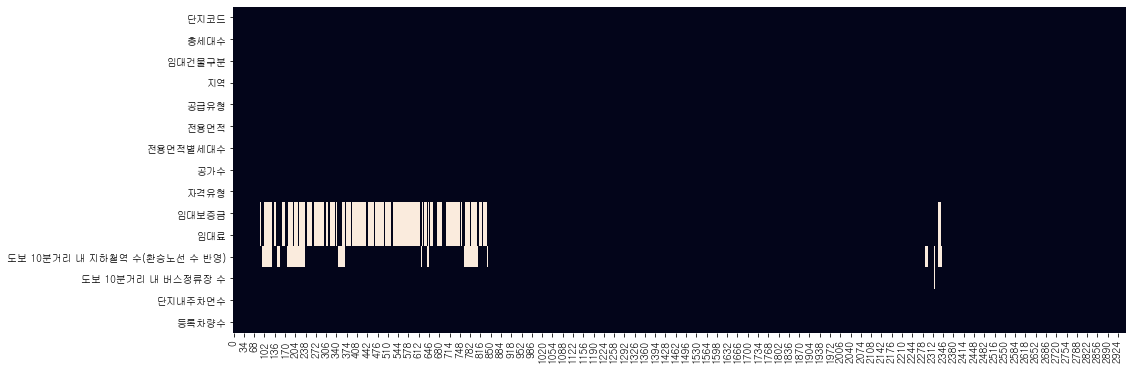

In [28]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull().T, cbar=False)
plt.show()

In [37]:
train.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,569


- 임대보증금, 임대료, 지하철역, 버스정류장 에서 결측치가 있습니다.
- 임대보증금, 임대료에서의 결측치는 등장하는 row가 동일해 보입니다.

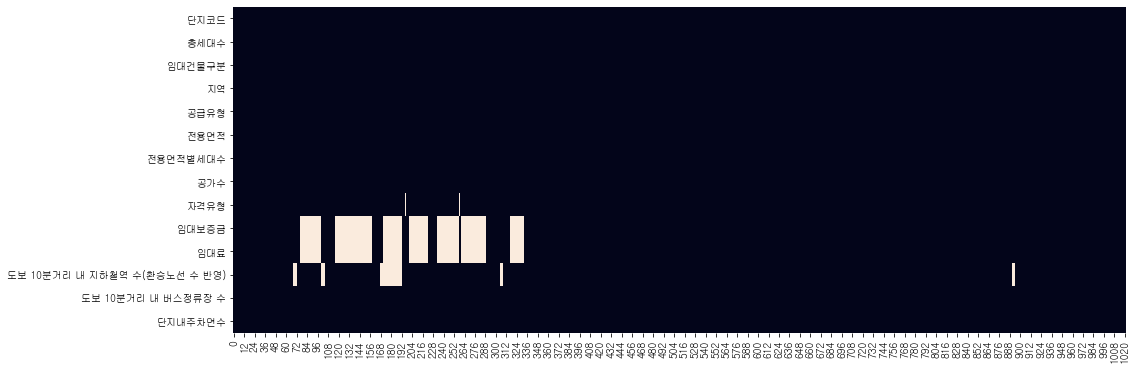

In [22]:
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull().T, cbar=False)
plt.show()

In [38]:
test.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,2
임대보증금,180


- test set에서는 자격유형에서 결측치가 조금 보입니다.
- 그리고 지하철역에서 결측치가 많이 보입니다.

#### NA of Subway

In [29]:
train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].sample(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
192,C1616,1507,상가,대전광역시,임대상가,54.51,1,1.0,D,NaN,NaN,NaN,2.0,407.0,98.0
771,C1004,521,상가,충청남도,임대상가,22.95,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
221,C2258,965,상가,대전광역시,임대상가,21.19,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0
191,C1616,1507,상가,대전광역시,임대상가,39.33,1,1.0,D,NaN,NaN,NaN,2.0,407.0,98.0
228,C2258,965,상가,대전광역시,임대상가,27.23,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0


In [30]:
print('전체 단지 수: ', train['단지코드'].nunique())
print('지하철 결측치 단지 수: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

전체 단지 수:  423
지하철 결측치 단지 수:  20
지하철 결측치 단지:  ['C1312' 'C1874' 'C1424' 'C2100' 'C2520' 'C1616' 'C1704' 'C2258' 'C1068'
 'C1983' 'C2216' 'C2644' 'C1005' 'C1004' 'C1875' 'C2156' 'C1175' 'C2583'
 'C1649' 'C1350']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시' '경상남도']


- 지하철 결측값은 총 20개의 단지에서 발생했습니다.
- 지하철 결측값은 충남, 대전, 경남에서만 발생하였습니다.
- 해당 지역에 지하철이 없더라도 0.0 으로 값이 채워져 있는 단지가 있습니다.
- 따라서 패턴이 없는 단순 결측치로 보입니다.
- 그러나 충남 북부나, 경남 남부 같은 경우는 지하철이 있는 도시가 있습니다. 마찬가지로 대전은 대전지하철이 있습니다. 결측치를 채우는 것을 고심해봐야 합니다.

In [30]:
test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].sample(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
168,C2177,1245,아파트,충청남도,영구임대,26.37,478,2.0,C,3141000,69900,NaN,1.0,187.0
177,C2177,1245,상가,충청남도,임대상가,20.90,1,2.0,D,NaN,NaN,NaN,1.0,187.0
102,C1083,427,아파트,대전광역시,국민임대,51.99,107,0.0,A,32459000,187260,NaN,6.0,384.0
891,C1327,98,아파트,대전광역시,행복주택,16.83,30,13.0,J,18800000,94000,NaN,17.0,98.0
178,C2177,1245,상가,충청남도,임대상가,20.90,1,2.0,D,NaN,NaN,NaN,1.0,187.0


In [26]:
print('전체 단지 수: ', test['단지코드'].nunique())
print('지하철 결측치 단지 수: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

전체 단지 수:  150
지하철 결측치 단지 수:  5
지하철 결측치 단지:  ['C1472' 'C1083' 'C2177' 'C1318' 'C1327']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시']


- test set에서는 5개 단지에서 지하철 정보가 없습니다. 전부 충남과 대전입니다.

#### NA of BusStop

In [41]:
train.loc[train['도보 10분거리 내 버스정류장 수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0


In [42]:
train.loc[train['도보 10분거리 내 버스정류장 수'].isnull()]['지역'].unique()

array(['경상남도'], dtype=object)

- 버스 정류장 데이터가 없는 단지는 단 하나 뿐입니다.
- test set에는 없습니다.

#### NA of 임대보증금, 임대료

##### **아파트 유형**

In [39]:
train.loc[(train['임대건물구분'] != '상가') & (train['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


- 대전에 있는 다온숲3단지입니다.
- https://new.land.naver.com/complexes/108763?ms=36.293306,127.338904,17&a=OPST&b=B2&e=RETAIL

In [43]:
test.loc[(test['임대건물구분'] != '상가') & (test['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0


- train, test 에서 임대보증금과 임대료가 결측치인 단지가 1개씩 존재합니다.
- 대전둔산1단지 주공아파트 입니다.
- https://apply.lh.or.kr/LH/index.html#SIL::CLCC_SIL_0060:1010203

##### **상가 유형**

In [33]:
train.loc[train['단지코드'] == 'C1004'].head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
764,C1004,521,아파트,충청남도,영구임대,39.30,240,3.0,C,4682000,104180,NaN,2.0,153.0,93.0
765,C1004,521,아파트,충청남도,영구임대,39.69,264,3.0,C,4728000,105210,NaN,2.0,153.0,93.0
766,C1004,521,상가,충청남도,임대상가,19.00,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
767,C1004,521,상가,충청남도,임대상가,14.10,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
768,C1004,521,상가,충청남도,임대상가,19.31,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0


In [34]:
len(train.loc[train['임대건물구분'] == '상가'])

562

In [35]:
train.loc[train['임대건물구분'] == '상가'].isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,562


- 아파트 단지에 상가가 있는 경우가 있습니다.
- 상가는 임대보증금, 임대료가 전부 결측치입니다.

In [36]:
print('전체 단지 수: ', train['단지코드'].nunique())
print('상가 보유 단지 수: ', train.loc[train['임대건물구분'] == '상가']['단지코드'].nunique())
print('상가 보유 단지: ', train.loc[train['임대건물구분'] == '상가']['단지코드'].unique())
print('상가 보유 단지 지역: ', train.loc[train['임대건물구분'] == '상가']['지역'].unique())

전체 단지 수:  423
상가 보유 단지 수:  33
상가 보유 단지:  ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571']
상가 보유 단지 지역:  ['강원도' '충청남도' '경상남도' '대전광역시' '부산광역시' '제주특별자치도']


- 총 33개 단지에서 상가를 보유하고 있습니다.
- 지역도 매우 다양합니다.

In [34]:
len(test.loc[test['임대건물구분'] == '상가'])

177

In [35]:
test.loc[test['임대건물구분'] == '상가'].isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,177


- train set과 마찬가지로 test set에서도 상가건물은 임대보증금과 임대료가 결측치입니다.

In [36]:
print('전체 단지 수: ', test['단지코드'].nunique())
print('상가 보유 단지 수: ', test.loc[test['임대건물구분'] == '상가']['단지코드'].nunique())
print('상가 보유 단지: ', test.loc[test['임대건물구분'] == '상가']['단지코드'].unique())
print('상가 보유 단지 지역: ', test.loc[test['임대건물구분'] == '상가']['지역'].unique())

전체 단지 수:  150
상가 보유 단지 수:  7
상가 보유 단지:  ['C1006' 'C2676' 'C2177' 'C2033' 'C1812' 'C2253' 'C1729']
상가 보유 단지 지역:  ['대전광역시' '부산광역시' '충청남도' '울산광역시' '강원도']


- test set에서는 총 7개 단지에서 상가가 있으며
- 대전, 부산, 충남, 울산, 강원에 있습니다.

#### NA of 자격유형

test set에서 자격유형의 결측치가 존재합니다.

In [24]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


- test set의 2개 단지에서 자격유형에 대한 결측치가 보입니다.
- 자격유형은 마스킹이 되어 있기 때문에, 공급유형에 따른 최빈값으로 채워줘야겠습니다.

### Outlier

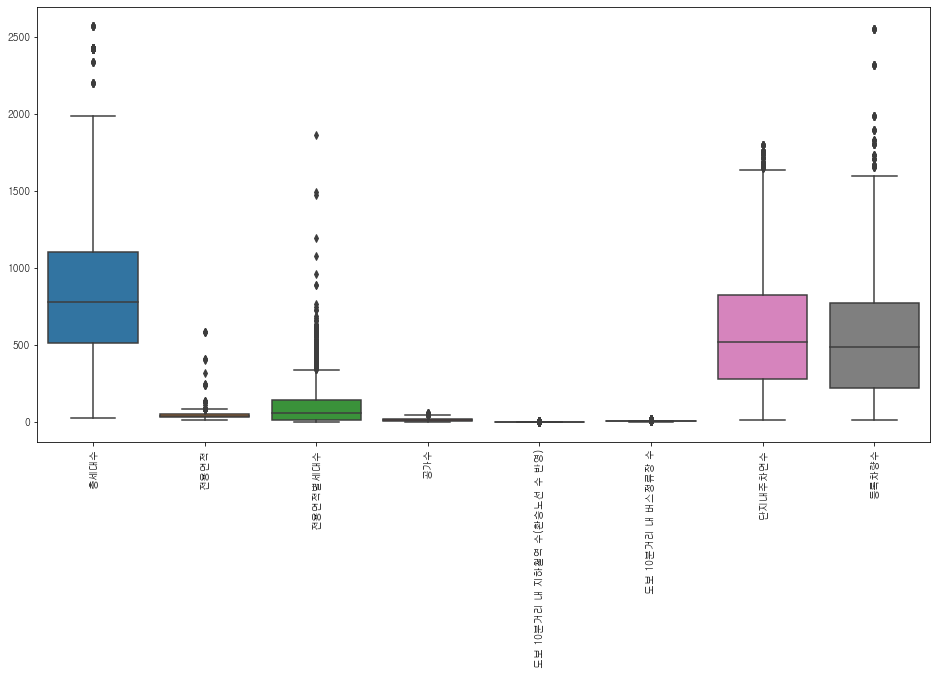

In [44]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.show()

In [45]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)

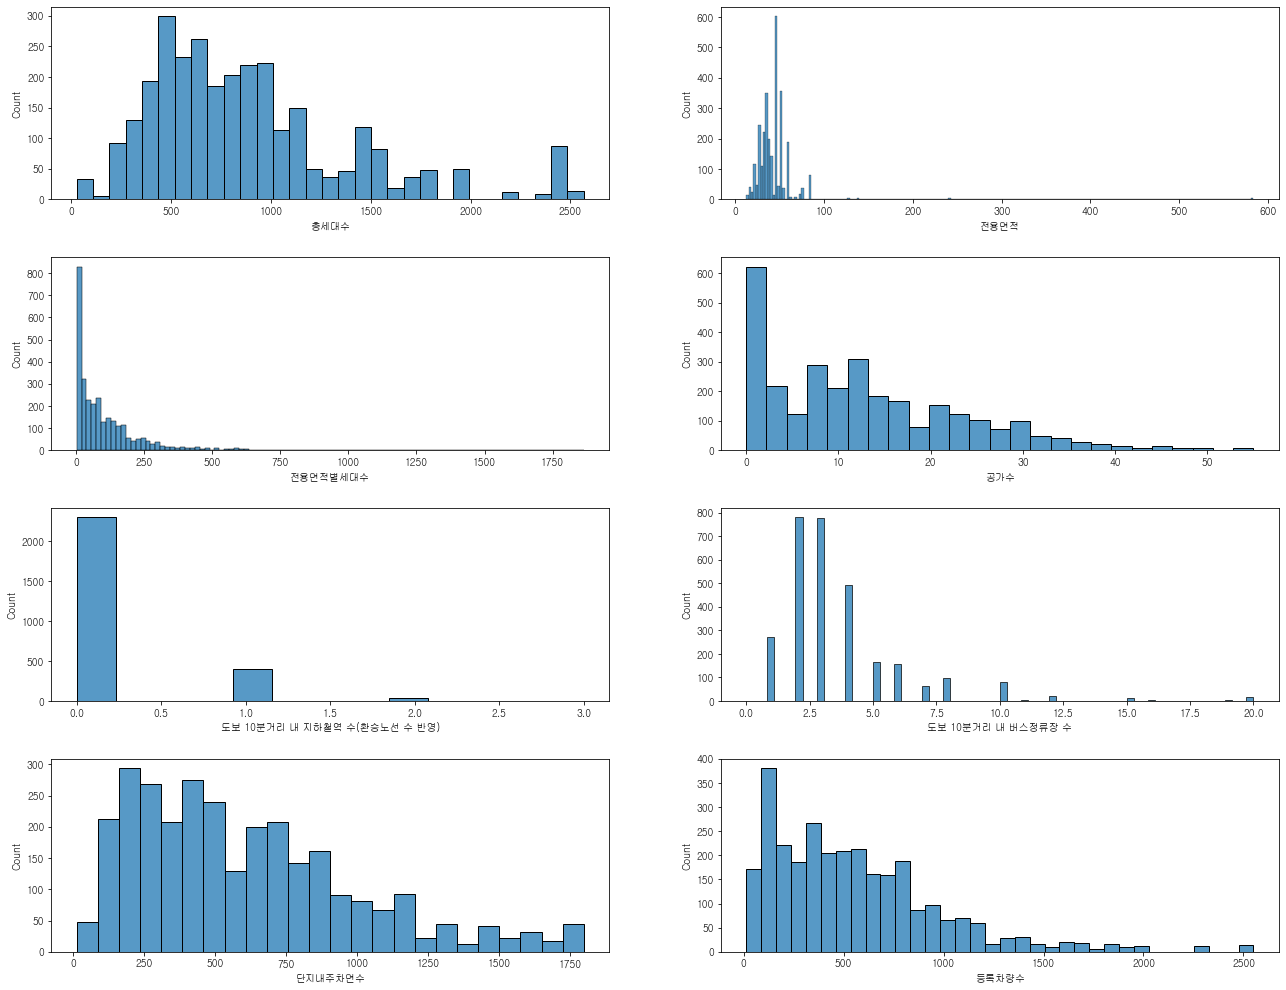

In [46]:
fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])

- 전용면적, 전용면적별세대수 컬럼은 매우 skew한 분포를 띄고 있습니다.
- 총세대수, 단지내주차면서, 등록차량수 컬럼 또한 꼬리에서 튀어오르고 있습니다.
- 아웃라이어라고 할 수 있는 대단지가 존재하는 것으로 보입니다.

In [47]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '총세대수']].nlargest(3, '총세대수')

,단지코드,총세대수
2511,C1363,2568
522,C2132,2428
261,C1859,2424


In [48]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '총세대수']].nsmallest(3, '총세대수')

,단지코드,총세대수
2821,C2059,26
2942,C2020,40
2200,C2237,70


- 2568 세대가 있는 단지부터 26 세대 뿐인 단지까지 있습니다.

In [49]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '등록차량수']].nlargest(3, '등록차량수')

,단지코드,등록차량수
2511,C1363,2550.0
2331,C1350,2315.0
2619,C1802,1983.0


In [50]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '등록차량수']].nsmallest(3, '등록차량수')

,단지코드,등록차량수
2821,C2059,13.0
2945,C2437,16.0
822,C2401,19.0


- 2550대가 등록 된 단지부터 13대만 등록되어 있는 단지까지 있습니다.

### Columns

#### Train/Test-Column-Values-Check

In [88]:
def check_train_test_column_values(train, test, column):
    # 함수 정의: 두 데이터 테이블과 특정 컬럼을 집어 넣으면 value를 비교하여 출력하는 함수
    print("{} Column에 대한 train_test_values_check 입니다=======================".format(column))
    # Train/Test set의 입력 칼럼의 value를 set으로 받아줍니다.
    train_colset = set(train[column])
    test_colset  = set(test[column])

    # Train/Test-set 고유한 value의 개수를 구함.
    print(f"Train-set에 있는 고유한 value 개수 : {len(train_colset)}")
    print(f"Test-set에 있는 고유한 value 개수 : {len(test_colset)}")

    # Train/Test-set 모두에 포함되어있는 value를 구함.
    print('='* 80)
    common_colset = train_colset.intersection(test_colset)
    print(f"Train/Test-set에 공통으로 포함되어 있는 value 개수 : {len(common_colset)}")
    if len(common_colset) > 100: # value가 너무 많으면 어차피 보기 힘드므로 출력을 pass 합니다
        pass
    else:
        try: # int나 float은 sorted가 먹지 않기 때문에 try except로 넣어줍니다.
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {sorted(common_colset)}")
        except:
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {(common_colset)}")

    # Train-set에만 있는 value를 구함.
    print('='* 80)
    train_only_colset = train_colset.difference(test_colset)
    print(f"Train-set에만 있는 value는 총 {len(train_only_colset)} 개 입니다.")
    if len(train_only_colset) > 100:
        pass
    else:
        try:
            print(f"Train-set에만 있는 value는 : {sorted(train_only_colset)}")
        except:
            print(f"Train-set에만 있는 value는 : {(train_only_colset)}")

    # Test-set에만 있는 value를 구함.
    print('='* 80)
    test_only_colset = test_colset.difference(train_colset)
    print(f"Test-set에만 있는 value는 총 {len(test_only_colset)} 개 입니다.")
    if len(test_only_colset) > 100:
        pass
    else:
        try:
            print(f"Test-set에만 있는 value는 : {sorted(test_only_colset)}")
        except:
            print(f"Test-set에만 있는 value는 : {(test_only_colset)}")
    print(" ")

In [89]:
obj_cols = []
for col in train.columns:
    if train[col].dtypes == 'object':
        obj_cols.append(col)

In [90]:
for col in obj_cols:
    check_train_test_column_values(train, test, col)

단지코드 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 423
Test-set에 있는 고유한 value 개수 : 150
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 0
Train/Test-set에 공통으로 포함되어 있는 value : []
Train-set에만 있는 value는 총 423 개 입니다.
Test-set에만 있는 value는 총 150 개 입니다.
 
임대건물구분 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 2
Test-set에 있는 고유한 value 개수 : 2
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 2
Train/Test-set에 공통으로 포함되어 있는 value : ['상가', '아파트']
Train-set에만 있는 value는 총 0 개 입니다.
Train-set에만 있는 value는 : []
Test-set에만 있는 value는 총 0 개 입니다.
Test-set에만 있는 value는 : []
 
지역 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 16
Test-set에 있는 고유한 value 개수 : 15
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 15
Train/Test-set에 공통으로 포함되어 있는 value : ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
Train-set에만 있는 value는 총 1 개 입니다.
T

#### 전용면적

In [51]:
train.loc[train['단지코드'] == 'C2612'][['단지코드', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']]

,단지코드,전용면적,전용면적별세대수,자격유형,임대보증금,임대료
2463,C2612,29.71,628,A,9800000,154000
2464,C2612,29.71,54,A,9800000,154000
2465,C2612,36.61,620,A,12800000,197000
2466,C2612,46.41,382,A,27500000,257000


- 전용면적이 동일한 데이터가 있어서 알아보니 타입이 다른 것입니다.

In [52]:
from IPython.display import Image
Image(url='qqq.jpg', width=500)

LH 청약센터 홈페이지에서 찾은 C2612 아파트의 임대 공고 정보입니다. 전용면적과 전용면적별세대수가 정확히 일치합니다.<br>
즉, **전용면적이 같더라도 타입이 다르고, 전용면적별세대수가 별도로 존재**하는 것입니다.

#### 자격유형

In [53]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [54]:
train['자격유형'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [57]:
train.groupby(['단지코드', '전용면적', '전용면적별세대수'])['자격유형'].nunique().value_counts()

1    2631
Name: 자격유형, dtype: int64

- 전부 타입당 1개의 신분만을 가집니다.
- 즉, 해당 타입을 임차할 수 있는 자격이 정해져 있습니다.

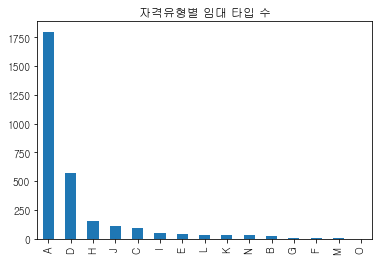

In [58]:
train['자격유형'].value_counts().plot(kind='bar')
plt.title('자격유형별 임대 타입 수')
plt.show()

- 분양된 타입은 A가 가장 많습니다.
- 이 또한 매우 Skewed한 분포입니다.

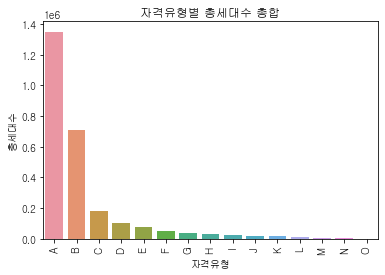

In [59]:
sns.barplot(data=train.groupby(['자격유형']).sum().sort_values(by=['총세대수'], ascending=False),
            x=train.groupby(['자격유형']).sum().index, y='총세대수')
plt.title('자격유형별 총세대수 총합')
plt.xticks(rotation=90)
plt.show()

- 그러나 세대수의 총합은 D보다는 B와 C가 많습니다.
- 알파벳 순서로 보아 총세대수의 순으로 마스킹이 된 듯합니다.

In [60]:
train.loc[train['임대건물구분'] == '상가']['자격유형'].value_counts()

D    562
Name: 자격유형, dtype: int64

#### 지역

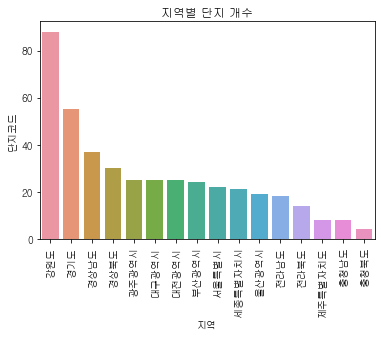

In [61]:
sns.barplot(data=train.groupby(['지역']).nunique().sort_values(by=['단지코드'], ascending=False),
            x=train.groupby(['지역']).nunique().index, y='단지코드')
plt.xticks(rotation=90)
plt.title('지역별 단지 개수')
plt.show()

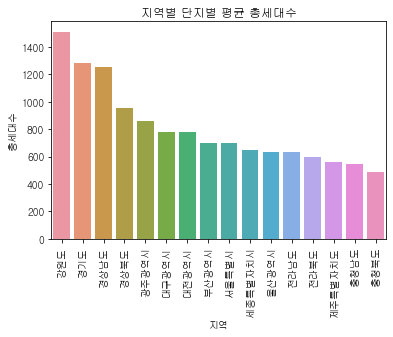

In [62]:
sns.barplot(data=train.groupby(['지역']).mean().sort_values(by=['총세대수'], ascending=False),
            x=train.groupby(['지역']).mean().index, y='총세대수')
plt.xticks(rotation=90)
plt.title('지역별 단지별 평균 총세대수')
plt.show()

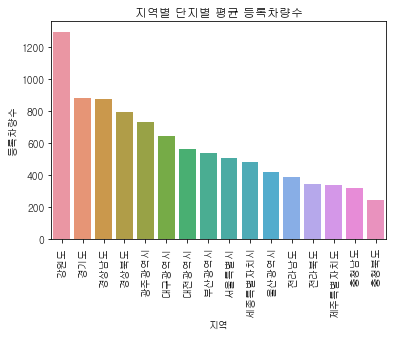

In [63]:
sns.barplot(data=train.groupby(['지역']).mean().sort_values(by=['등록차량수'], ascending=False),
            x=train.groupby(['지역']).mean().index, y='등록차량수')
plt.xticks(rotation=90)
plt.title('지역별 단지별 평균 등록차량수')
plt.show()

#### 공급유형

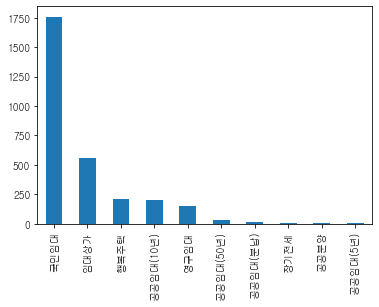

In [66]:
train['공급유형'].value_counts().plot(kind='bar')
plt.show()

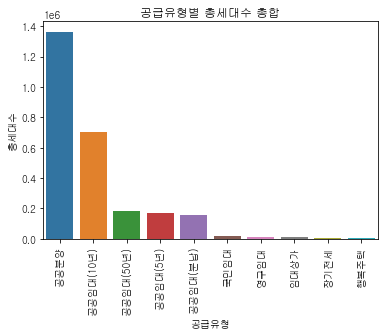

In [67]:
sns.barplot(data=train.groupby(['공급유형']).sum().sort_values(by=['총세대수'], ascending=False),
            x=train.groupby(['공급유형']).sum().index, y='총세대수')
plt.title('공급유형별 총세대수 총합')
plt.xticks(rotation=90)
plt.show()

- 총세대수는 공공분양과 공공임대가 압도적으로 많습니다. 한 번에 많이 모집하는 것으로 보입니다.
- 반면에 국민임대는 세대수는 적은 것으로 보아 적은 수를 자주 모집하는 듯합니다.

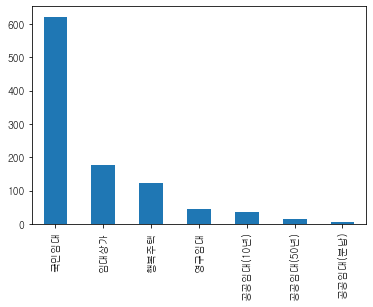

In [76]:
test['공급유형'].value_counts().plot(kind='bar')
plt.show()

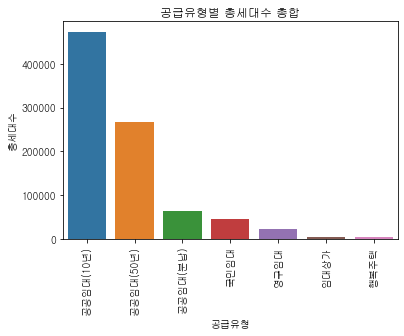

In [77]:
sns.barplot(data=test.groupby(['공급유형']).sum().sort_values(by=['총세대수'], ascending=False),
            x=test.groupby(['공급유형']).sum().index, y='총세대수')
plt.title('공급유형별 총세대수 총합')
plt.xticks(rotation=90)
plt.show()

#### 지하철

In [71]:
train_danji['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts()

0.0    359
1.0     38
2.0      5
3.0      1
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

<AxesSubplot:xlabel='지역'>

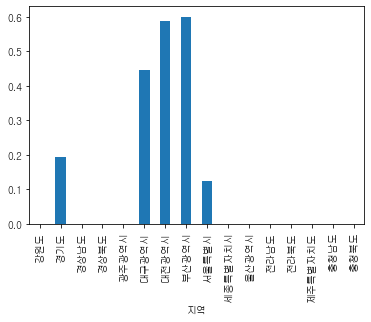

In [75]:
train_danji.groupby(['지역'])['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean().plot(kind='bar')

#### 버스

In [93]:
train_danji['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     113
3.0     104
4.0      64
1.0      45
5.0      27
6.0      25
8.0      13
7.0      10
10.0      8
12.0      4
20.0      3
19.0      1
16.0      1
15.0      1
14.0      1
11.0      1
0.0       1
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

<AxesSubplot:xlabel='지역'>

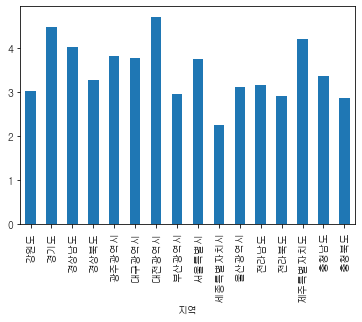

In [94]:
train_danji.groupby(['지역'])['도보 10분거리 내 버스정류장 수'].mean().plot(kind='bar')

In [93]:
train_danji['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     113
3.0     104
4.0      64
1.0      45
5.0      27
6.0      25
8.0      13
7.0      10
10.0      8
12.0      4
20.0      3
19.0      1
16.0      1
15.0      1
14.0      1
11.0      1
0.0       1
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

<AxesSubplot:xlabel='지역'>

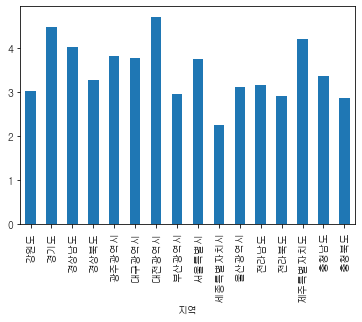

In [94]:
train_danji.groupby(['지역'])['도보 10분거리 내 버스정류장 수'].mean().plot(kind='bar')